In [28]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pathlib import Path
import gzip
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
# datasetName = "debate2024_Jun_bluesky"
datasetName = "trumpIncident2024_Jul_bluesky"
dataPath = Path("Data")

In [30]:
with gzip.open(dataPath / f"{datasetName}.feather.gz", 'rb') as f:
    df = pd.read_feather(f)

In [31]:
df

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
0,2024-07-13 00:00:00.152000+00:00,[],[],[],Dear lord!,did:plc:lzckrwnkqjd5wmft6shratai,at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,reply,en
1,2024-07-13 00:00:00.289000+00:00,[],[],[],You don't think Anakin can win?,did:plc:4j3zupp5vmzxsy3tqkdaxoe7,at://did:plc:4j3zupp5vmzxsy3tqkdaxoe7/app.bsky...,None,None,None,None,post,None
2,2024-07-13 00:00:00.267000+00:00,[],[],[],there's something about Vance's deep-set eyes ...,did:plc:a5f3sq7smc3v3jyglbi2fi5j,at://did:plc:a5f3sq7smc3v3jyglbi2fi5j/app.bsky...,at://did:plc:jb2q4yqmgpmefxd4xx66gepm/app.bsky...,did:plc:jb2q4yqmgpmefxd4xx66gepm,at://did:plc:e6n7jxtu2qrhwvp3j6ib6sq6/app.bsky...,did:plc:e6n7jxtu2qrhwvp3j6ib6sq6,reply,en
3,2024-07-12 23:59:59.603000+00:00,[],[],[],Vitória do dia consegui cagar,did:plc:sz5ppt4vxaaqbjq5v6a7wz72,at://did:plc:sz5ppt4vxaaqbjq5v6a7wz72/app.bsky...,None,None,None,None,post,pt
4,2024-07-13 00:00:00.060000+00:00,[],[],[],ぽなかがおかしいですわ,did:plc:jumthid7gybjbjch3y6fpg4l,at://did:plc:jumthid7gybjbjch3y6fpg4l/app.bsky...,None,None,None,None,post,ja
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148193,2024-07-14 23:59:57.916000+00:00,[],[],[],The best way to lower the political temperatur...,did:plc:bjkgeukdorajil5oge7j2vg6,at://did:plc:bjkgeukdorajil5oge7j2vg6/app.bsky...,at://did:plc:s5fi6htc7xhnshxxn37dg65c/app.bsky...,did:plc:s5fi6htc7xhnshxxn37dg65c,None,None,repost,en
2148194,2024-07-14 23:59:57.882000+00:00,[],[],[],,did:plc:jv4cvackhzyqvt3pjaf7mo3c,at://did:plc:jv4cvackhzyqvt3pjaf7mo3c/app.bsky...,at://did:plc:hqp4sby2esq5iaz54ddid2gj/app.bsky...,did:plc:hqp4sby2esq5iaz54ddid2gj,at://did:plc:tqo24hvfvcvcdl6ek6f3zd7o/app.bsky...,did:plc:tqo24hvfvcvcdl6ek6f3zd7o,repost,en
2148195,2024-07-14 23:59:58.649000+00:00,[],[],[],There is a type of dog called the New Guinea S...,did:plc:khoudzsvjeyjdgba5sr6ncon,at://did:plc:khoudzsvjeyjdgba5sr6ncon/app.bsky...,at://did:plc:x4rkbrazjqyyun5ysut2wq43/app.bsky...,did:plc:x4rkbrazjqyyun5ysut2wq43,at://did:plc:siw2ye4nu3py44qjkn6c3h3x/app.bsky...,did:plc:siw2ye4nu3py44qjkn6c3h3x,repost,en
2148196,2024-07-14 23:59:58.442000+00:00,[],[],[],the fuck did i do,did:plc:b3r4nnou3a3c4erdyblzxqel,at://did:plc:b3r4nnou3a3c4erdyblzxqel/app.bsky...,at://did:plc:b3r4nnou3a3c4erdyblzxqel/app.bsky...,did:plc:b3r4nnou3a3c4erdyblzxqel,at://did:plc:msfoxgxcr3um5abe53hggwuy/app.bsky...,did:plc:msfoxgxcr3um5abe53hggwuy,repost,en


In [6]:
df.head(5)

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
0,2024-07-13 00:00:00.152000+00:00,[],[],[],Dear lord!,did:plc:lzckrwnkqjd5wmft6shratai,at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...,did:plc:ihavsdtkraodnytrzncjlrsi,reply,en
1,2024-07-13 00:00:00.289000+00:00,[],[],[],You don't think Anakin can win?,did:plc:4j3zupp5vmzxsy3tqkdaxoe7,at://did:plc:4j3zupp5vmzxsy3tqkdaxoe7/app.bsky...,None,None,None,None,post,None
2,2024-07-13 00:00:00.267000+00:00,[],[],[],there's something about Vance's deep-set eyes ...,did:plc:a5f3sq7smc3v3jyglbi2fi5j,at://did:plc:a5f3sq7smc3v3jyglbi2fi5j/app.bsky...,at://did:plc:jb2q4yqmgpmefxd4xx66gepm/app.bsky...,did:plc:jb2q4yqmgpmefxd4xx66gepm,at://did:plc:e6n7jxtu2qrhwvp3j6ib6sq6/app.bsky...,did:plc:e6n7jxtu2qrhwvp3j6ib6sq6,reply,en
3,2024-07-12 23:59:59.603000+00:00,[],[],[],Vitória do dia consegui cagar,did:plc:sz5ppt4vxaaqbjq5v6a7wz72,at://did:plc:sz5ppt4vxaaqbjq5v6a7wz72/app.bsky...,None,None,None,None,post,pt
4,2024-07-13 00:00:00.060000+00:00,[],[],[],ぽなかがおかしいですわ,did:plc:jumthid7gybjbjch3y6fpg4l,at://did:plc:jumthid7gybjbjch3y6fpg4l/app.bsky...,None,None,None,None,post,ja


In [32]:
df.tail(5)

,creation_date,hashtags,mentioned_users,urls,text,user_id,post_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs
2148193,2024-07-14 23:59:57.916000+00:00,[],[],[],The best way to lower the political temperatur...,did:plc:bjkgeukdorajil5oge7j2vg6,at://did:plc:bjkgeukdorajil5oge7j2vg6/app.bsky...,at://did:plc:s5fi6htc7xhnshxxn37dg65c/app.bsky...,did:plc:s5fi6htc7xhnshxxn37dg65c,None,None,repost,en
2148194,2024-07-14 23:59:57.882000+00:00,[],[],[],,did:plc:jv4cvackhzyqvt3pjaf7mo3c,at://did:plc:jv4cvackhzyqvt3pjaf7mo3c/app.bsky...,at://did:plc:hqp4sby2esq5iaz54ddid2gj/app.bsky...,did:plc:hqp4sby2esq5iaz54ddid2gj,at://did:plc:tqo24hvfvcvcdl6ek6f3zd7o/app.bsky...,did:plc:tqo24hvfvcvcdl6ek6f3zd7o,repost,en
2148195,2024-07-14 23:59:58.649000+00:00,[],[],[],There is a type of dog called the New Guinea S...,did:plc:khoudzsvjeyjdgba5sr6ncon,at://did:plc:khoudzsvjeyjdgba5sr6ncon/app.bsky...,at://did:plc:x4rkbrazjqyyun5ysut2wq43/app.bsky...,did:plc:x4rkbrazjqyyun5ysut2wq43,at://did:plc:siw2ye4nu3py44qjkn6c3h3x/app.bsky...,did:plc:siw2ye4nu3py44qjkn6c3h3x,repost,en
2148196,2024-07-14 23:59:58.442000+00:00,[],[],[],the fuck did i do,did:plc:b3r4nnou3a3c4erdyblzxqel,at://did:plc:b3r4nnou3a3c4erdyblzxqel/app.bsky...,at://did:plc:b3r4nnou3a3c4erdyblzxqel/app.bsky...,did:plc:b3r4nnou3a3c4erdyblzxqel,at://did:plc:msfoxgxcr3um5abe53hggwuy/app.bsky...,did:plc:msfoxgxcr3um5abe53hggwuy,repost,en
2148197,2024-07-14 23:59:59.394000+00:00,[],[],[],Remember to always give source links a click b...,did:plc:7brgkol4s45a5fmh7iskhleb,at://did:plc:7brgkol4s45a5fmh7iskhleb/app.bsky...,at://did:plc:4z3is5zgzq3jwoci3lxjst5e/app.bsky...,did:plc:4z3is5zgzq3jwoci3lxjst5e,at://did:plc:6jiacryoehvmcyywvdehkg5w/app.bsky...,did:plc:6jiacryoehvmcyywvdehkg5w,repost,en


In [33]:
df.text.head(5)

0                                           Dear lord!
1                      You don't think Anakin can win?
2    there's something about Vance's deep-set eyes ...
3                        Vitória do dia consegui cagar
4                                          ぽなかがおかしいですわ
Name: text, dtype: object

In [34]:
df["text"].head(5)

0                                           Dear lord!
1                      You don't think Anakin can win?
2    there's something about Vance's deep-set eyes ...
3                        Vitória do dia consegui cagar
4                                          ぽなかがおかしいですわ
Name: text, dtype: object

In [35]:
df.keys()

Index(['creation_date', 'hashtags', 'mentioned_users', 'urls', 'text',
       'user_id', 'post_id', 'linked_post', 'linked_post_user_id', 'root_post',
       'root_post_user_id', 'post_type', 'data_langs'],
      dtype='object')

In [36]:
df.post_type

0           reply
1            post
2           reply
3            post
4            post
            ...  
2148193    repost
2148194    repost
2148195    repost
2148196    repost
2148197    repost
Name: post_type, Length: 2148198, dtype: object

In [37]:
df.post_type.value_counts()

post_type
post      900288
reply     734230
repost    513680
Name: count, dtype: int64

In [38]:
df.iloc[0]

creation_date                           2024-07-13 00:00:00.152000+00:00
hashtags                                                              []
mentioned_users                                                       []
urls                                                                  []
text                                                          Dear lord!
user_id                                 did:plc:lzckrwnkqjd5wmft6shratai
post_id                at://did:plc:lzckrwnkqjd5wmft6shratai/app.bsky...
linked_post            at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...
linked_post_user_id                     did:plc:ihavsdtkraodnytrzncjlrsi
root_post              at://did:plc:ihavsdtkraodnytrzncjlrsi/app.bsky...
root_post_user_id                       did:plc:ihavsdtkraodnytrzncjlrsi
post_type                                                          reply
data_langs                                                            en
Name: 0, dtype: object

In [39]:
df.dtypes

creation_date          datetime64[ns, UTC]
hashtags                            object
mentioned_users                     object
urls                                object
text                                object
user_id                             object
post_id                             object
linked_post                         object
linked_post_user_id                 object
root_post                           object
root_post_user_id                   object
post_type                           object
data_langs                          object
dtype: object

<Axes: xlabel='creation_date'>

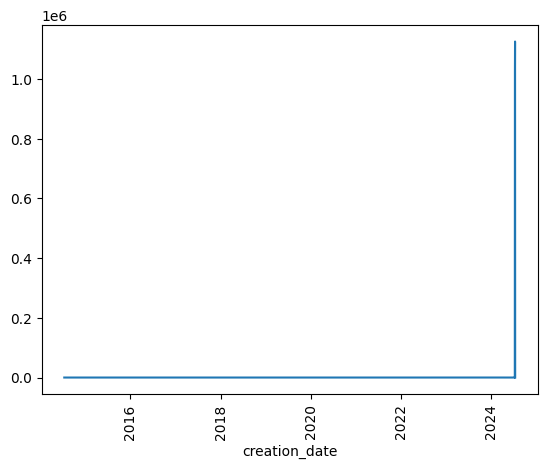

In [40]:
df['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

/tmp/ipykernel_481114/1802059922.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfFiltered['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90)


<Axes: xlabel='creation_date'>

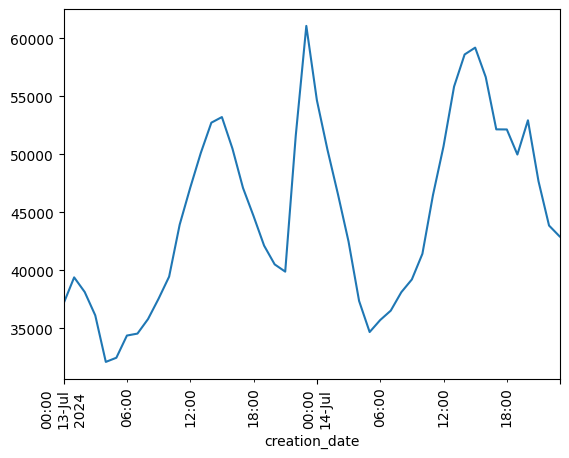

In [44]:
# plot hourly

start_date = '2024-07-13'
end_date = '2024-07-15'
dfFiltered = df[df['creation_date'].between(start_date, end_date)]
# bin each hour and plot the count
dfFiltered['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90)


/tmp/ipykernel_481114/3877263846.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfFiltered['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90)


<Axes: xlabel='creation_date'>

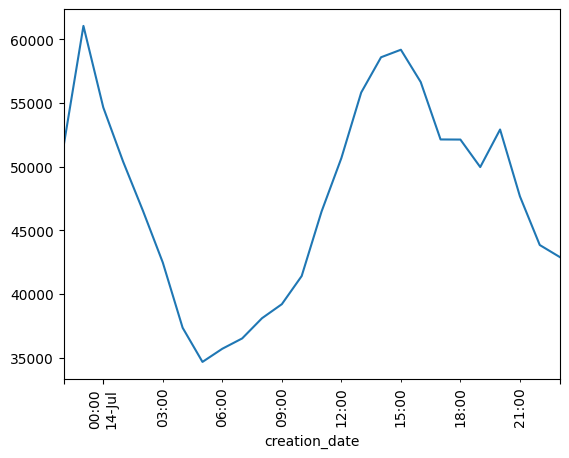

In [50]:
# Filter starting on 2024-07-13 at 23:00 UTC

start_date = '2024-07-13 22:00:00'
end_date = '2024-07-15'
dfFiltered = df[df['creation_date'].between(start_date, end_date)]
# bin each hour and plot the count
dfFiltered['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90)


<Axes: xlabel='Number of posts', ylabel='Language'>

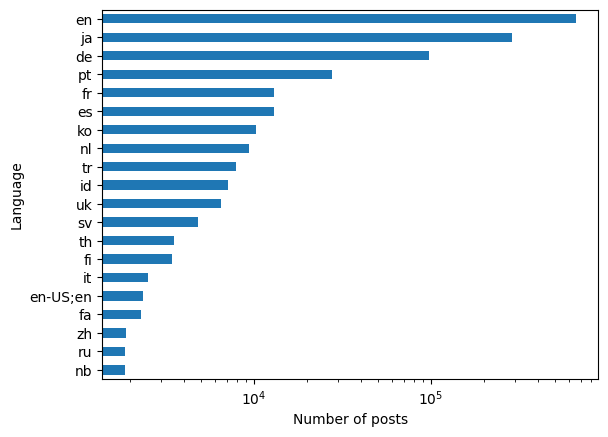

In [51]:
display(dfFiltered["data_langs"].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Language",xlabel="Number of posts"))

<Axes: xlabel='Number of posts', ylabel='Hashtag'>

/mnt/helios/miniconda3/envs/ic2s2_tutorial/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/mnt/helios/miniconda3/envs/ic2s2_tutorial/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/mnt/helios/miniconda3/envs/ic2s2_tutorial/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21531 (\N{CJK UNIFIED IDEOGRAPH-541B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/mnt/helios/miniconda3/envs/ic2s2_tutorial/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12408 (\N{HIRAGANA LETTER HE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/mnt/helios/miniconda3/envs/ic2s2_tutorial/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752})

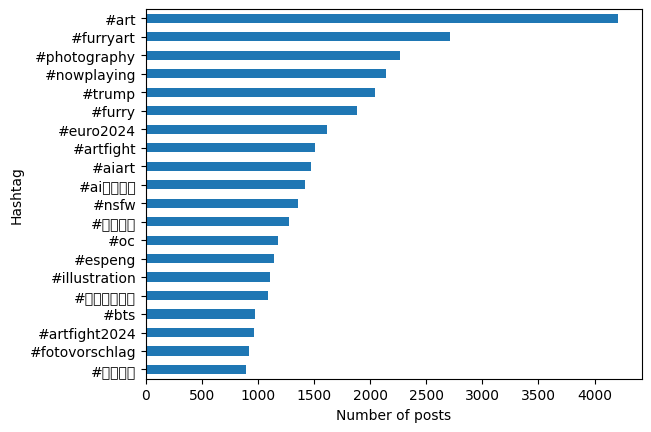

In [52]:
# get counts of the hashtags
# hashtags are lists of strings
# clean each hashtag
hashtags = dfFiltered["hashtags"].dropna().apply(lambda hashtagList: [hashtag.lower().strip() for hashtag in hashtagList])
hashtagsExploded = hashtags.explode()
hashtagsExplodedCounts = hashtagsExploded.value_counts(ascending=True)
hashtagsExplodedCounts.tail(20).plot(kind='barh',xlabel="Number of posts",ylabel="Hashtag")

/tmp/ipykernel_481114/2787491675.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  posts_with_hashtag['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90,label=hashtag)
/tmp/ipykernel_481114/2787491675.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  posts_with_hashtag['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90,label=hashtag)


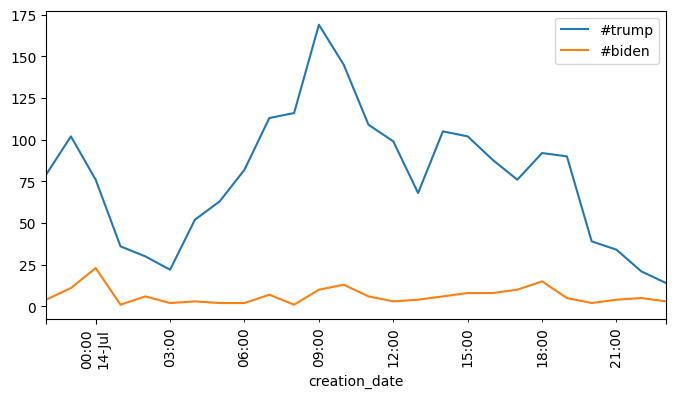

In [53]:
top_hashtags = hashtagsExplodedCounts.tail(10).iloc[::-1].index
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for hashtag in ["#trump","#biden"]:
    posts_with_hashtag = dfFiltered[hashtags.apply(lambda hashtags: hashtag in hashtags)]
    posts_with_hashtag['creation_date'].dt.floor('H').value_counts().sort_index().plot(rot=90,label=hashtag)
plt.legend()


In [35]:
# Custom from the audience

In [54]:
# Save to filtered feather format 
with gzip.open(dataPath / f"{datasetName}_filtered.feather.gz", 'wb') as f:
    dfFiltered.reset_index(drop=True).to_feather(f)